In [1]:
import sys
from dotenv import load_dotenv, dotenv_values
load_dotenv("../cv19.env")
sys.path.append(dotenv_values("../cv19.env")["CV19ROOT"])

In [2]:
import pandas as pd

In [3]:
from cv19.simulation import simulation

In [4]:
# Initialize the simulation object
config_file = "../config_files/main.json"
sim = simulation(config_file, verbose=False)

In [5]:
# Run the simulation
sim.run()

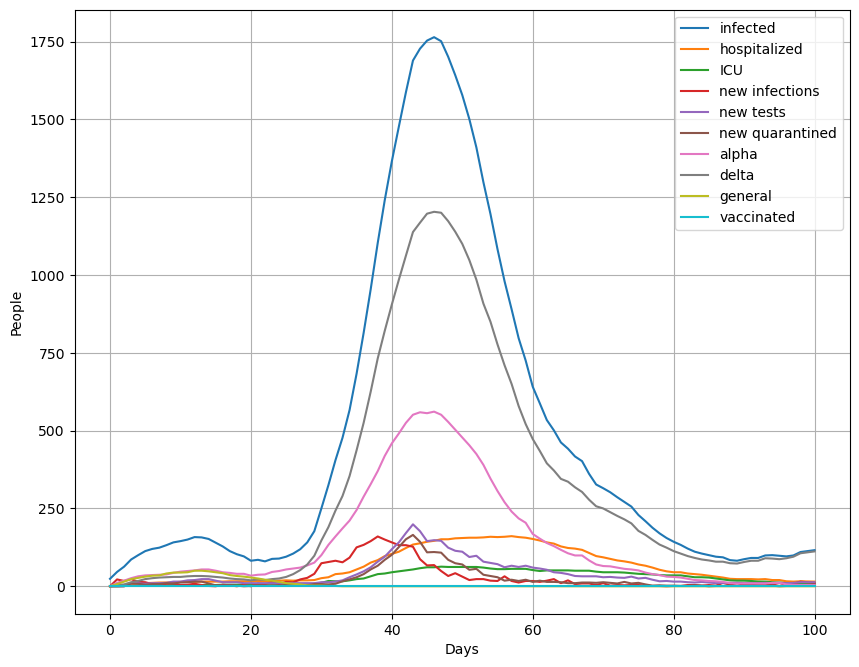

In [11]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":True, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":True, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":False, "plot_testing":False, "plot_students":False, 
            "plot_vaccinated":True, "plot_virus_types":{"alpha":True, "delta":True, "general":True},
            'log':False}        
sim.plot(**plot_kws)

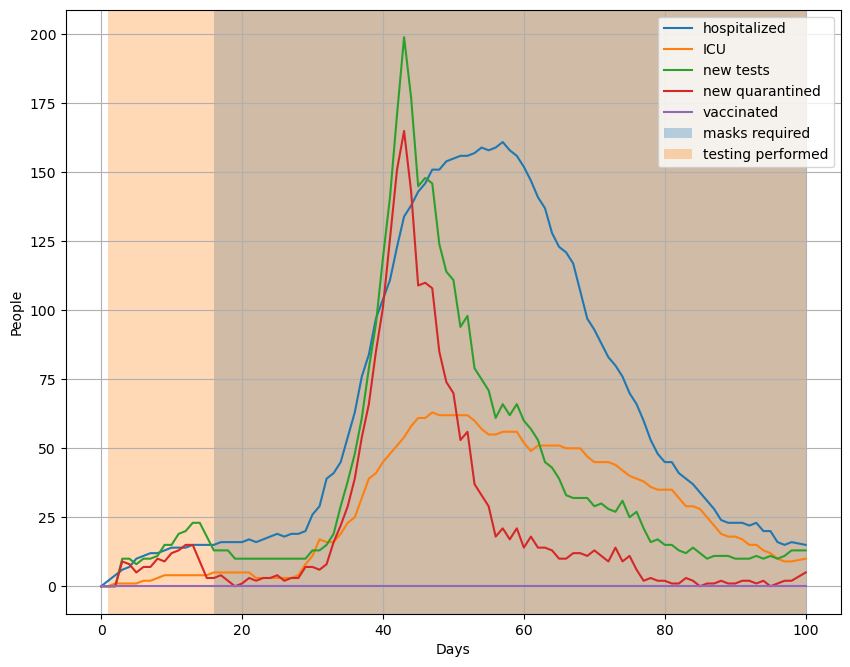

In [7]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":False, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":False, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":True, "plot_testing":True, "plot_students":False,
            "plot_vaccinated":True,
            'log':False}        
sim.plot(**plot_kws)

In [8]:
# Example of how to access the raw data and convert to a pandas DataFrame.
raw_data = sim.get_arrays()
df = pd.DataFrame(raw_data)
df.index.rename('day', inplace=True)
df.head()

,infected,new_infected,recovered,susceptible,dead,quarantined,inf_students,total_tested,new_tested,hospitalized,ICU,testing_enforced,masks_enforced,lockdown_enforced,time_elapsed,vaccinated,general,alpha,delta
day,,,,,,,,,,,,,,,,,,,
0,24,0,0,9976,0,0,7,0,0,0,0,False,True,False,0.556378,0,0,0,0
1,46,22,0,9954,0,0,14,0,0,2,0,True,False,False,1.133455,0,7,11,4
2,63,17,0,9937,0,0,22,0,0,4,1,True,False,False,1.770168,0,15,18,6
3,86,23,0,9914,0,9,26,10,10,6,1,True,False,False,1.972425,0,23,26,13
4,100,14,0,9900,0,17,28,20,10,7,1,True,False,True,2.254336,0,27,32,17
